___
# Capítulo 7 - Modelos de Aprendizado
## Seção 2 - Regressão Linear
___

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import rcParams

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sns.set_style('whitegrid')

PREDIZER QUANTOS INSCRITOS VAO TER ANO QUE VEM


Metados sobre o conjunto [podem ser encontrados aqui](https://www3.nd.edu/~busiforc/handouts/Data%20and%20Stories/regression/enrollment%20forecast/enrollment.html).

Em resumo:

1.YEAR: 1961 = 1, 1989 = 29

2.ROLL: Inscritos no Outono 

3.UNEM: Taxa de desemprego no Novo México em Janeiro (%)

4.HGRAD: Quantidade de formados na turma anterior Novo México

5.INC: Renda Per capita na cidade de Albuquerque (1961 dollars) 

In [3]:
caminho = 'C:/Users/booth13-mgr2/Desktop/roteiros/dados/enrollment_forecast.csv'
inscritos= pd.read_csv(caminho)
inscritos.columns = ['year','roll','unem', 'hgrad', 'inc']
inscritos.head()

,year,roll,unem,hgrad,inc
0,1,5501,8.1,9552,1923
1,2,5945,7.0,9680,1961
2,3,6629,7.3,9731,1979
3,4,7556,7.5,11666,2030
4,5,8716,7.0,14675,2112


#### Regressão linear nos dados de inscrição


conferindo se existe uma relacao linear entre as variaveis e vendo se elas sao continuas

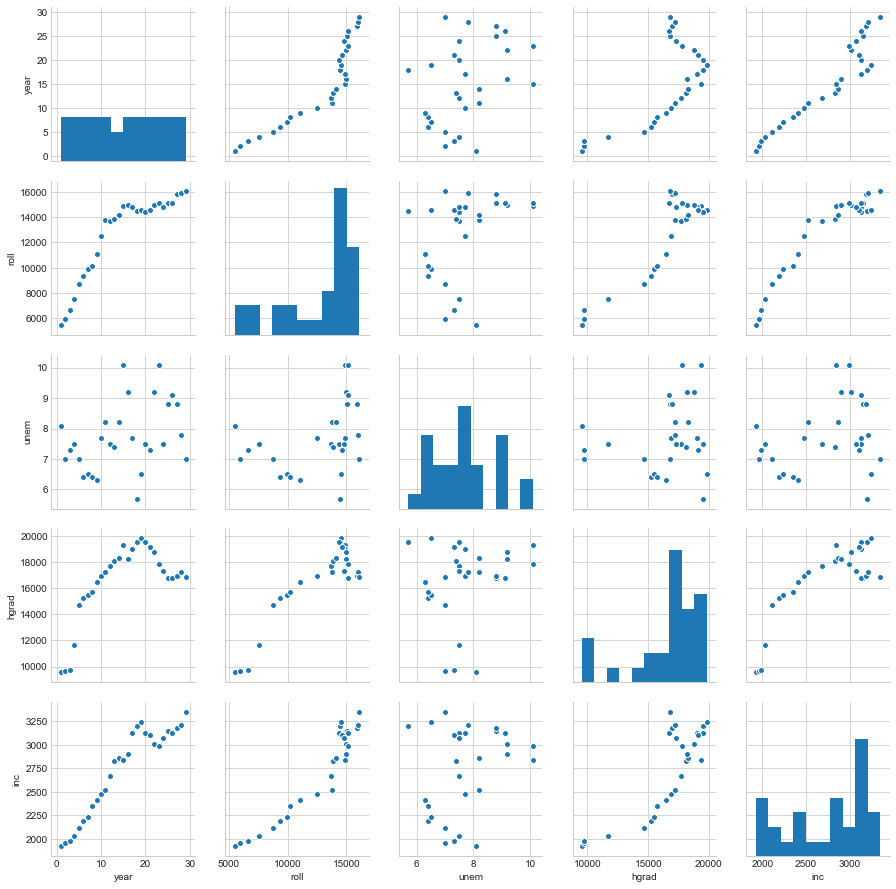

In [4]:
sns.pairplot(inscritos)

Checando se as nossas variaveis sao correlacionadas

In [5]:
print(inscritos.corr())

           year      roll      unem     hgrad       inc
year   1.000000  0.900934  0.378305  0.670300  0.944287
roll   0.900934  1.000000  0.391344  0.890294  0.949876
unem   0.378305  0.391344  1.000000  0.177376  0.282310
hgrad  0.670300  0.890294  0.177376  1.000000  0.820089
inc    0.944287  0.949876  0.282310  0.820089  1.000000


In [6]:
inscritos_cols = ['unem', 'hgrad']
inscritos_data = inscritos[inscritos_cols].values
inscritos_target = inscritos['roll'].values

X, y = scale(inscritos_data), inscritos_target

### Conferindo se temos valores nulos

In [7]:
em_branco = X == np.NAN
X[em_branco == True]

array([], dtype=float64)

### Aplicando a Regressão Linear

In [8]:
lin_reg = LinearRegression(normalize=True)

lin_reg.fit(X,y)

print(lin_reg.score(X,y))

0.848881266613
